In [1]:
f=open('Royal_data.txt','r')
lines=f.readlines()
lines

['The future king is the prince\n',
 'Daughter is the princess\n',
 'Son is the prince\n',
 'Only a man can be a king\n',
 'Only a woman can be a queen\n',
 'The princess will be a queen\n',
 'The prince is a strong man\n',
 'The princess is a beautiful woman\n',
 'Prince is only a boy now\n',
 'Prince will be king\n',
 'A boy will be a man']

Removing Stopping Words

In [2]:
stoppingWords=['the','is','a','can','be','now']

sent=[]
for i in lines:
    temp=[]
    line=i.lower()
    line=line.replace("\n","")
    for words in line.split(" "):
        if words not in stoppingWords:
            temp.append(words)
    sent.append(temp)
print(sent)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['only', 'man', 'king'], ['only', 'woman', 'queen'], ['princess', 'will', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'only', 'boy'], ['prince', 'will', 'king'], ['boy', 'will', 'man']]


Bigrams

In [3]:
bigrams=[]
for i in sent:
    for j in range(len(i)-1):
        for k in range(j+1,len(i)):
            bigrams.append([i[j],i[k]])
            bigrams.append([i[k],i[j]])
            
print(bigrams)
            

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['man', 'only'], ['only', 'king'], ['king', 'only'], ['man', 'king'], ['king', 'man'], ['only', 'woman'], ['woman', 'only'], ['only', 'queen'], ['queen', 'only'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'will'], ['will', 'princess'], ['princess', 'queen'], ['queen', 'princess'], ['will', 'queen'], ['queen', 'will'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'only'], ['only', 'prince'], ['prince', 'boy'], ['boy', 'prince'], ['only', 'boy'], ['boy', 'only'], ['prince', 'will'], ['will', 'prince'], ['prince', 'king'

One-hot Encodding

In [4]:

all_words=[]
for i in bigrams:
    all_words.extend(i)
print(all_words)
all_vocals=sorted(list(set(all_words)))
print(all_vocals)

['future', 'king', 'king', 'future', 'future', 'prince', 'prince', 'future', 'king', 'prince', 'prince', 'king', 'daughter', 'princess', 'princess', 'daughter', 'son', 'prince', 'prince', 'son', 'only', 'man', 'man', 'only', 'only', 'king', 'king', 'only', 'man', 'king', 'king', 'man', 'only', 'woman', 'woman', 'only', 'only', 'queen', 'queen', 'only', 'woman', 'queen', 'queen', 'woman', 'princess', 'will', 'will', 'princess', 'princess', 'queen', 'queen', 'princess', 'will', 'queen', 'queen', 'will', 'prince', 'strong', 'strong', 'prince', 'prince', 'man', 'man', 'prince', 'strong', 'man', 'man', 'strong', 'princess', 'beautiful', 'beautiful', 'princess', 'princess', 'woman', 'woman', 'princess', 'beautiful', 'woman', 'woman', 'beautiful', 'prince', 'only', 'only', 'prince', 'prince', 'boy', 'boy', 'prince', 'only', 'boy', 'boy', 'only', 'prince', 'will', 'will', 'prince', 'prince', 'king', 'king', 'prince', 'will', 'king', 'king', 'will', 'boy', 'will', 'will', 'boy', 'boy', 'man', '

In [5]:
encoder=dict()
n=len(all_vocals)
for (i,x) in enumerate(all_vocals):
    temp=[]
    for j in range(n):
        if i==j:
            temp.append(1)
        else:
            temp.append(0)
    encoder[x]=temp
print(encoder)

{'beautiful': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'boy': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'daughter': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'future': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'king': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'man': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'only': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'prince': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'princess': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'queen': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'son': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'strong': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'will': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 'woman': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}


In [6]:
x=[]
y=[]
for i in bigrams:
    x.append(encoder[i[0]])
    y.append(encoder[i[1]])
print(x)
print(y)
    

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

Vectorizer

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense 

In [8]:
model=Sequential([
    Input(shape=(n,)),
    Dense(2,activation='linear'),
    Dense(n,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 30        
                                                                 
 dense_1 (Dense)             (None, 14)                42        
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x,y,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.6600 - accuracy: 0.0862
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6583 - accuracy: 0.0862
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 2.6569 - accuracy: 0.0862
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 2.6554 - accuracy: 0.0862
Epoch 5/1000
2/2 [==============================] - 0s 1ms/step - loss: 2.6538 - accuracy: 0.0862
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6524 - accuracy: 0.0862
Epoch 7/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6510 - accuracy: 0.0862
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.6497 - accuracy: 0.0862
Epoch 9/1000
2/2 [==============================] - 0s 1ms/step - loss: 2.6480 - accuracy: 0.0862
Epoch 10/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.6467 - accuracy: 0.0862
Epoch 11/1000
2/2 [

Vectors

In [11]:
w=model.get_weights()[0]
w             # weights of hidden layer will act as vectors, so a word is represented as vectors, with 6 possible combination of 0's and 1's  

array([[-1.3178152 ,  1.2046235 ],
       [ 1.8521371 ,  0.3933021 ],
       [-1.7241994 , -0.01026419],
       [ 1.5817055 , -1.2785774 ],
       [ 1.6198305 ,  0.19556293],
       [ 1.4142731 ,  0.3292648 ],
       [-0.12418985, -0.5513573 ],
       [ 0.9547053 ,  0.30292222],
       [-0.9462666 ,  1.2421538 ],
       [ 0.06696249,  1.6609038 ],
       [ 1.6348515 , -1.9097534 ],
       [ 0.6820934 , -1.4550235 ],
       [-0.5982806 , -1.4475116 ],
       [-0.7495314 ,  0.37635118]], dtype=float32)

In [12]:
vectors={}
for i,x in enumerate(all_vocals):
    vectors[x]=w[i]
    
print(vectors)

{'beautiful': array([-1.3178152,  1.2046235], dtype=float32), 'boy': array([1.8521371, 0.3933021], dtype=float32), 'daughter': array([-1.7241994 , -0.01026419], dtype=float32), 'future': array([ 1.5817055, -1.2785774], dtype=float32), 'king': array([1.6198305 , 0.19556293], dtype=float32), 'man': array([1.4142731, 0.3292648], dtype=float32), 'only': array([-0.12418985, -0.5513573 ], dtype=float32), 'prince': array([0.9547053 , 0.30292222], dtype=float32), 'princess': array([-0.9462666,  1.2421538], dtype=float32), 'queen': array([0.06696249, 1.6609038 ], dtype=float32), 'son': array([ 1.6348515, -1.9097534], dtype=float32), 'strong': array([ 0.6820934, -1.4550235], dtype=float32), 'will': array([-0.5982806, -1.4475116], dtype=float32), 'woman': array([-0.7495314 ,  0.37635118], dtype=float32)}


Plotting and Visualization

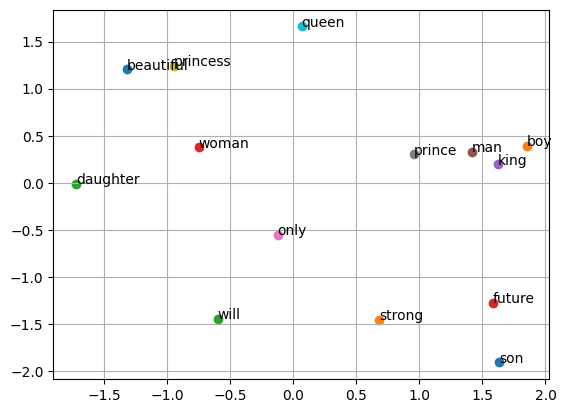

In [13]:
import matplotlib.pyplot as plt
for coords in vectors:
    plt.scatter(vectors[coords][0],vectors[coords][1])
    plt.annotate(coords,(vectors[coords][0],vectors[coords][1]))
plt.grid(True)
plt.show()